In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file = pd.read_csv("data.csv",usecols=["text", "label"])
file

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate
...,...,...
40618,we should forcibly remove all the foreigners f...,hate
40619,we should forcibly remove all the immigrants f...,hate
40620,dalits are unworthy of the Gods love,hate
40621,dalits are worthless,hate


In [3]:
with open("dictionary.txt", "r") as f:
    word_index_new = eval(f.read())

In [4]:
comment1 = list(file['text'])
comment2 = [string.lower() for string in comment1]
comment3 = [string.split(" ") for string in comment2]


prelabel = list(file['label'])
label = []
for x in prelabel:
    if x == "hate":
        label.append(1)
    else:
        label.append(0)
        
comments = []
for comm in comment3:
    comment = []
    for word in comm:
        comment.append(word_index_new[word])
    comments.append(comment)

In [5]:
xtrain_list = comments[:36564]
ytrain_list = label[:36564]
xtest_list = comments[36564:]
ytest_list = label[36564:]


In [6]:
xtrain = np.array(xtrain_list)
ytrain = np.array(ytrain_list)
xtest = np.array(xtest_list)
ytest = np.array(ytest_list)
len(xtrain)

<ipython-input-6-a59a146d7c57>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xtrain = np.array(xtrain_list)
<ipython-input-6-a59a146d7c57>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xtest = np.array(xtest_list)


36564

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index_new.items()])

In [8]:
xtrain = keras.preprocessing.sequence.pad_sequences(xtrain, value=word_index_new["<PAD>"], padding="post", maxlen=250)
xtest = keras.preprocessing.sequence.pad_sequences(xtest, value=word_index_new["<PAD>"], padding="post", maxlen=250)

In [32]:
model = keras.Sequential()
model.add(keras.layers.Embedding(36095+1, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          577536    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 577,825
Trainable params: 577,825
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [34]:
x_val = xtrain[:4500]
x_train = xtrain[4500:]
y_val = ytrain[:4500]
y_train = ytrain[4500:]
x_train = np.asarray(xtrain).astype(np.int32)
y_train = np.asarray(ytrain).astype(np.int32)
x_val = np.asarray(x_val).astype(np.int32)
y_val = np.asarray(y_val).astype(np.int32)
xtest = np.asarray(xtest).astype(np.int32)
ytest = np.asarray(ytest).astype(np.int32)

In [3]:
fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)
results = model.evaluate(xtest, ytest)

NameError: name 'model' is not defined

In [2]:
history_dict = fitModel.history
history_dict.keys()

NameError: name 'fitModel' is not defined

Minimum validation loss: 0.1362898200750351


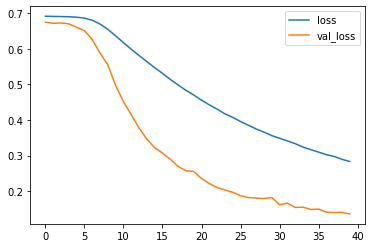

In [37]:
history_df = pd.DataFrame(fitModel.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

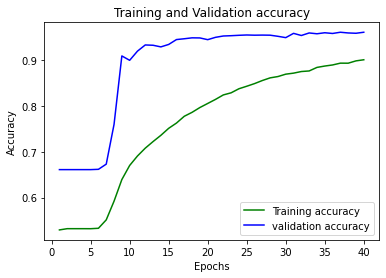

In [38]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss_train = fitModel.history['accuracy']
loss_val = fitModel.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
y_true = list(ytest)
test_reviews = list(xtest)
y_pred = []

In [41]:
for i in range(len(test_reviews)):
    y_pred.append(model.predict([test_reviews[i]]))
    
print(len(y_true), len(y_pred))
    

4059 4059


In [47]:
y_pred4 = y_pred[:4062]

y_pred2 = []
for i in y_pred4:
    y_pred2.append(i[0])
y_pred3 = []
for i in y_pred2:
    if i >= 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

In [48]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred3, average='weighted')

0.678419198934569

In [49]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_true, y_pred3, average="macro")

0.6481300268096515

In [50]:
recall_score(y_true, y_pred3, average="macro")

0.6281258847606798

In [46]:
model.save("Best10.h5")

In [52]:
results

[0.548332154750824, 0.7504311203956604]